# Toy Datasets 분석하기!
**3가지 Toy Datasets(Digits, Wine, BreastCancer)을 이용해 분석을 해보자.**
- 프로젝트에 제시한 5가지 모델 사용
- 각 데이터마다 다른 방법으로 분석 실시
- 정확도 향상을 위한 다양한 방법 적용
  - **K-Fold Cross Validation**
  - **GridSearch**


## 목차
**1. Digits Datasets**
  - 데이터 로드
  - 데이터 확인
  - 비교할 분류기 정의
  - 분류기별 결과 저장(학습 및 평가)
  - 결과 중 필요한 부분만 추출
  - 분류기별 결과 시각화
  - 데이터에 맞는 평가 지표는 무엇인가?
  
<hr>  

**2. Wine Datasets**
  - 데이터 로드
  - 데이터 확인
  - 비교할 분류기 정의
  - 분류기별 결과 저장(학습 및 평가) - **K-Fold Cross Validation 적용**
  - 결과 중 필요한 부분만 추출
  - 분류기별 결과 시각화
  - 데이터에 맞는 평가 지표는 무엇인가?

<hr>  

**3. Cancer Breast Datasets**
  - 데이터 로드
  - 데이터 확인
  - 비교할 분류기 정의
  - 하이퍼파라미터 조합 정의 - **GridSearch 사전 작업**
  - GridSearch 진행(학습 및 평가) - **GridSearch**
  - GridSearch 결과확인
  - 분류기별 결과 확인
  - 분류기별 결과 시각화
  - 데이터에 맞는 평가 지표는 무엇인가?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(40)

# Digits Datasets
가장 일반적인 방법으로 분석 실행
- 사용하고자 하는 모든 분류기에 대해 학습 진행
- 정확도 향상을 위한 어떠한 기법도 사용하지 않고 진행

## 데이터 로드
- 사용하고자 하는 데이터 로드(Digits dataset)
- 단순히 ```train_test_split()```함수를 이용해 train(x,y) test(x,y)로 분리

In [2]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True, as_frame=True)

df_digits = pd.concat([X, y], axis=1)
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## 데이터 확인

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
print(f'Size of X_Train : {X_train.shape}')
print(f'Size of y_Train : {y_train.shape}')
print(f'Size of X_Test : {X_test.shape}')
print(f'Size of y_Test : {y_test.shape}')

Size of X_Train : (1347, 64)
Size of y_Train : (1347,)
Size of X_Test : (450, 64)
Size of y_Test : (450,)


## 비교할 분류기 정의
- SVM, LogisticRegression, SGDClassifier의 경우 입력데이터(X)의 scale이 결과에 영향을 주기 때문에<br>
  ```StandardScaler()```를 통해 rescale해준다.

In [4]:
cls_dt = DecisionTreeClassifier(random_state=40)                               # DecisionTree
cls_rf = RandomForestClassifier(max_depth=2, random_state=40)                  # RandomForest
cls_svm = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=40))  # SVM
cls_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=40))  # LogisticRegression
cls_sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, \
                                                        tol=1e-3, \
                                                        random_state=40))      # SGDClassifier

## 분류기별 결과 저장

In [5]:
model_name = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic'] # 분류기 이름
model_list = [cls_dt, cls_rf, cls_svm, cls_sgd, cls_lr]                   # 분류기 List

results = {} # 학습된 분류기에 Test데이터로 평가한 결과 모음
for name, model in zip(model_name, model_list):
    y_pred = model.fit(X_train, y_train).predict(X_test)                    # 학습과 예측을 동시에 진행
    results[name] = classification_report(y_test, y_pred, output_dict=True) # Test결과 
    print(f'{name} Finished')

Decision Tree Finished
Random Forest Finished
SVM Finished
SGD Finished
Logistic Finished


## 결과 중 필요한 부분만 추출
- Accuracy, Macro Average 중 Precision, Recall, F1-score만 사용

In [6]:
data = {}
for name, score in results.items():
    data[name] = {'accuracy' : score['accuracy'], **score['macro avg']} # 딕셔너리 자료형 합치기(merge) 
    del data[name]['support']  # Support 요소 삭제
df_result = pd.DataFrame(data).T # index와 column 바꾸기(전치행렬)
df_result

,accuracy,precision,recall,f1-score
Decision Tree,0.815556,0.822198,0.820473,0.818340
Random Forest,0.768889,0.785194,0.784712,0.760032
SVM,0.980000,0.981678,0.980206,0.980475
SGD,0.942222,0.946896,0.945540,0.945473
Logistic,0.968889,0.969742,0.971156,0.970187


## 결과 시각화

(0.0, 1.3)

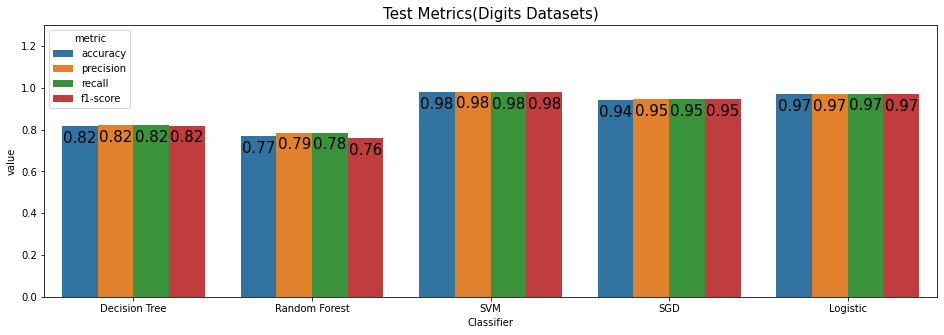

In [7]:
df_result['name'] = df_result.index # DataFrame의 index를 column에 추가
df_result_melted = df_result.melt(id_vars=['name'], var_name=['metric']) # name을 기준으로 수치들을 모두 한 줄로 정렬
                                                                          # metric 열을 추가해 column의 이름들 정렬
plt.figure(figsize=(16,5))

splot = sns.barplot(x='name', y='value', hue='metric', data=df_result_melted)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.title('Test Metrics(Digits Datasets)', fontsize=15)
plt.xlabel('Classifier')
plt.ylim(0, 1.3)

## 데이터에 맞는 평가 지표는 무엇인가?
- Digits Datasets의 경우 사실 Recall과 Precision등의 영향을 받지 않는 데이터이다.<br>
- 단순히 정확도만 확인해도 무방하기 때문에 Accuracy를 평가지료로 사용하면 될 것 같다.
> **따라서 Digist Datasets은 Accuracy가 가장 높은 SVM 분류기를 사용하면 좋을 것 같다.**

# Wine Dataset
> 정확도 향상을 위한 기법 중 하나인 **K-Fold cross validation** 사용
- 사용하고자 하는 모든 분류기 학습
- 학습 간에 K-Fold cross validation을 사용하여 가장 결과가 좋은 모델 이용
- ```cross_validate()```함수를 이용해서 K-Fold cross validation 구현
<br>

> **K-Fold cross validation**은 Train 데이터 중 일부를 validation 데이터로 사용하는 경우 사용하는 기법이지만,<br>
> 데이터의 양이 적기 때문에 그냥 K-Fold cross validation의 결과(즉, validation 결과)를 Test의 결과로 대체

## 데이터 로드
- 사용하고자 하는 데이터 로드(Wine Dataset)
- K-fold cross validation을 사용하기 위해 Train과 Test로 나누지 않고 X와 y로만 분리
- k=5로 설정해여 5가지 경우의 수 중 가장 좋은 분류기 사용

In [8]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True, as_frame=True)

df_wine = pd.concat([X, y], axis=1)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 데이터 확인

In [9]:
print(f'Size of Input : {X.shape}')
print(f'Size of Label : {y.shape}')

Size of Input : (178, 13)
Size of Label : (178,)


## 비교할 분류기 정의
- SVM, LogisticRegression, SGDClassifier의 경우 데이터의 scale이 결과에 영향을 주기 때문에<br>
  ```StandardScaler()```를 통해 rescale해준다.

In [10]:
cls_dt = DecisionTreeClassifier(random_state=40)                               # DecisionTree
cls_rf = RandomForestClassifier(max_depth=2, random_state=40)                  # RandomForest
cls_svm = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=40))  # SVM
cls_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=40))  # LogisticRegression
cls_sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, \
                                                        tol=1e-3, \
                                                        random_state=40))      # SGDClassifier

## 분류기별 결과 저장(학습 및 평가)
- ```cross_validate()```함수를 이용해 K-Fold cross validation 구현
- k=5인자를 를 통해 5개의 폴더로 나누어서 학습 및 테스트
- scoring의 경우 원하는 평가지표만 가지고 왔다
  - Accuracy, Precision, Recall, F1-Score

> **5개의 결과 중 Accuracy가 가장 높은 경우 한 가지만 추출**

In [11]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

model_name = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic']
model_list = [cls_dt, cls_rf, cls_svm, cls_sgd, cls_lr]
scoring = {
    'acc': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1' : 'f1_macro'}

results = {}
for name, model in zip(model_name, model_list):
    print(f'{name} Finished')
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_estimator=True)
    results[name] = scores

Decision Tree Finished
Random Forest Finished
SVM Finished
SGD Finished
Logistic Finished


## 결과 중 필요한 부분만 추출
- Accuracy, Macro Average 중 Precision, Recall, F1-score만 사용

In [12]:
data = {}
for name, score in results.items():
    best_idx = scores['test_acc'].argmax()
    
    data[name] = {
        'accuracy' : score['test_acc'][best_idx],
        'precision' : score['test_precision'][best_idx],
        'recall' : score['test_recall'][best_idx],
        'f1-score' : score['test_f1'][best_idx]}
    
df_result = pd.DataFrame(data).T
df_result

,accuracy,precision,recall,f1-score
Decision Tree,0.861111,0.861472,0.857937,0.858523
Random Forest,0.944444,0.958333,0.944444,0.947475
SVM,0.944444,0.958333,0.938889,0.945741
SGD,0.972222,0.977778,0.972222,0.974013
Logistic,1.000000,1.000000,1.000000,1.000000


## 결과 시각화

(0.0, 1.3)

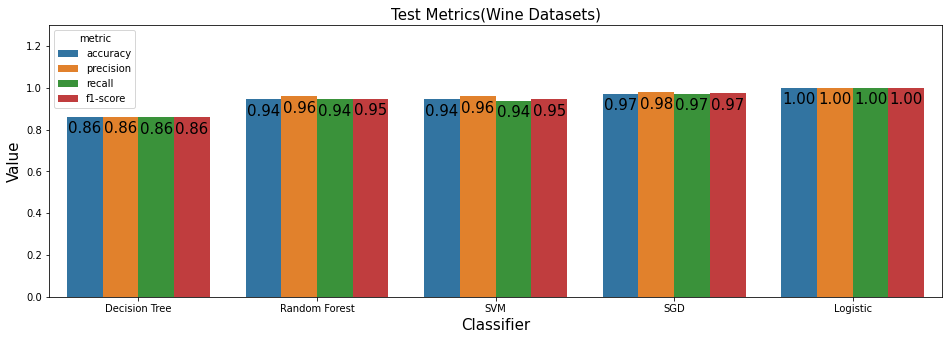

In [13]:
df_result['name'] = df_result.index # DataFrame의 index를 column에 추가
df_result_melted = df_result.melt(id_vars=['name'], var_name=['metric']) # name을 기준으로 수치들을 모두 한 줄로 정렬
                                                                          # metric 열을 추가해 column의 이름들 정렬

plt.figure(figsize=(16,5))

splot = sns.barplot(x='name', y='value', hue='metric', data=df_result_melted)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.title('Test Metrics(Wine Datasets)', fontsize=15)
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.ylim(0, 1.3)

## 데이터에 맞는 평가 지표는 무엇인가?
- Wine Datasets도 Digits Datasets과 마찬가지로 Recall과 Precision등의 영향을 받지 않는 데이터이다.<br>
- Recall, Precision이 골고루 적용된 AUC를 평가지료로 사용하면 될 것 같다.
> **따라서 Wine Datasets은 LogisticRegression 분류기를 사용하면 좋을 것 같다.**

# Breast Cancer Dataset
> 정확도 향상을 위한 기법 중 하나인 **Grid Search** 사용
- 사용하고자 하는 모든 분류기 학습
- 학습 간에 GridSearch을 사용하여 가장 결과가 좋은 모델 이용
- ```GridSearchCV()```함수를 이용해서 Grid Search 구현
  - **특정 분류기에 사용할 수 있는 하이퍼파라미터의 경우를 전부 테스트하는 방법**
  - 원하는 파라미터를 지정하고 반복문을 통해 수행
  - **GridSearch**의 경우에도 **K-Fold cross validation** 기법이 사용된다.
  
> 한 모델 당 학습되는 횟수 : K-Fold의 k값(k=5) X GridSearch의 파라미터 개수<br>
> 이번 경우에도 K-Fold cross validation의 결과를 Test의 결과로 대체

## 데이터 로드
- 사용하고자 하는 데이터 로드(Wine Dataset)
- K-fold cross validation을 사용하기 위해 Train과 Test로 나누지 않고 X와 y로만 분리
- k=5로 설정해여 5가지 경우의 수 중 가장 좋은 분류기 사용

In [14]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

df_breast_cancer = pd.concat([X, y], axis=1)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 데이터 확인

In [15]:
print(f'Size of Input : {X.shape}')
print(f'Size of Label : {y.shape}')

Size of Input : (569, 30)
Size of Label : (569,)


## 비교할 분류기 정의
- 위 2개의 예시와 다르게 이번 경우는 ```StandardScaler()```를 Pipeline에 묶지 않고 따로 적용<br>
- 위 2개의 예시와 다르게 모델을 정의할 때 파라미터값을 넣어주지 않음(GridSearch)
- ***GridSearch***를 이용하기 위해 위에서 정의한 **하이퍼파라미터 조합**을 인자로 사용

In [16]:
cls_dt = DecisionTreeClassifier(random_state=40)   # DecisionTree
cls_rf = RandomForestClassifier(random_state=40)   # RandomForest
cls_svm =SVC(random_state=40)                 # SVM
cls_lr = LogisticRegression(random_state=40)  # LogisticRegression
cls_sgd = SGDClassifier(random_state=40)      # SGDClassifier

## 하이퍼파라미터 조합 정의
- 분류기별 조합 가능한 파라미터 정의

In [17]:
svm_param = {'kernel': ('linear', 'rbf'), 'C': [1, 5, 10]}
log_param = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter':[1000]}
tree_param = {'criterion': ['gini','entropy'],'max_depth': list(range(5, 21, 5))}
forest_param = {
    "n_estimators": [250, 300],
    "criterion": ["gini", "entropy"],
    "max_features": [3, 5],
    "max_depth": [10, 20],
    "min_samples_split": [2, 4]}
sgd_param = {
    'alpha': [1e-2, 1e-1, 1e0, 1e1, 1e2],
    'penalty': ['l2'],
    'n_jobs': [-1]}

## Grid Search 진행(학습)
- refit='recall' 인자를 통해 Recall값을 기준으로 가장 좋은 모델 반환
  - 해당 인자로 인해 recall을 기준으로 계산을 하지만, 

In [ ]:
from sklearn.model_selection import GridSearchCV

model_name = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic']
model_list = [cls_dt, cls_rf, cls_svm, cls_sgd, cls_lr]
param_list = [tree_param, forest_param, svm_param, sgd_param, log_param] # 분류기별 하이퍼파라미터 List
scoring = {'recall': 'recall'} # Recall값을 얻기 위해 인자로 대입

scaler = StandardScaler() # 입력값 Scaling 객체 생성
scaler.fit(X) # 입력값(X)의 mean과 std 계산
X_scaled = scaler.transform(X) # 계산된 mean과 std를 실제 입력값(X)에 적용

print('GridSearch Start\n')

data = {}
results = {}
for name, model, param in zip(model_name, model_list, param_list):
    grid_search = GridSearchCV(model, param, cv=5, refit='recall', scoring=scoring) # Recall값을 기준으로 가장 좋은 모델 반환
    result = grid_search.fit(X_scaled, y) # GridSearch 실행
    results[name] = result.cv_results_ # 분류기별 결과 모음
    
    data[name] = {
        'best_param': result.best_params_, # 각 분류기별 Recall을 기준으로 결과가 가장 좋게 나오게 한 하이퍼파라미터
        'best_score': result.best_score_   # 결과가 가장 좋은 모델의 Recall값
    }
    
    print(f'{name} Finished')
    
print('\nGridSearch Finished')

GridSearch Start

Decision Tree Finished


## GridSearch 결과 확인
- 모델별로 없는 하아파라미터는 NaN값으로 반환
- NaN을 파라미터가 없다는 표시 적용

In [ ]:
df_gridsearch_result = pd.DataFrame(results)
df_gridsearch_result.replace(np.nan, 'No Parameter')

## 분류기별 결과 확인
**Recall** 기준으로 가장 좋은 모델만 확인

In [ ]:
df_best_cls = pd.DataFrame(data).T
df_best_cls

## 결과 시각화

In [ ]:
plt.figure(figsize=(12,5))

splot = sns.barplot(x=df_best_cls.index, y=df_best_cls['best_score'], data=df_best_cls)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.title('Test Result(Breast Cancer Datasets)', fontsize=15)
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('recall', fontsize=10)

## 데이터에 맞는 평가 지표는 무엇인가?
- Breast Cancer Datasets의 경우 사람의 생명과 연관된 데이터셋이기 때문에 판단이 필요하다.<br>
- 환자 입장에서는 암이 존재한다고 했을 때 놓치지 않고 검출하는 것이 가장 좋을 것이다.<br>
- 만약 암의 존재를 알아차라지 못하면 치료가 늦어져서 생명에 위험이 생기기 때문이다.<br>
- 하지만 암이 존재하지 않는데도 불구하고 존재한다고 검출을 했을 때는 그 순간 놀라긴 하지만<br>
결과적으로는 문제가 없기 때문에 안심할 수 있다.
- Breat Cancer Datasets의 경우 <u><strong>Recall</strong></u>의 지표가 매우 중요한 평가지표로 작용한다!**
> **따라서 Recall 수치가 가장 높은 SGDClassifier를 분류기로 사용하면 좋을 것 같다!**